# EJEMPLOS OPTIMIZACIÓN DE CARTERAS (MARKOWITZ)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cvxpy as cp
import yfinance as yf
import seaborn as sns


pd.options.display.float_format = '{:.4%}'.format

### **Ejercicio 1: Cálculo de la cartera con Mínimo Riesgo**

**Objetivo**: Minimizar el riesgo de un portafolio de inversión.

### Datos:
- **Retornos Esperados**: Un array `retornos_esperados` que contiene el retorno esperado para cada activo.
- **Matriz de Covarianza**: `matriz_cov`, describiendo la covarianza entre los activos y el riesgo combinado.


### Restricciones:
1. No se permiten posiciones cortas

Recordad que la varianza de una cartera, $ \sigma^2_p $, se calcula como:

$ \qquad \qquad \sigma^2_p = \mathbf{w}^T \Sigma \mathbf{w} $

donde:
- $ \mathbf{w} $ es el vector de pesos de la cartera. Cada elemento $ w_i $ representa la fracción del capital total invertido en el activo $ i $.
- $ \Sigma $ es la matriz de covarianza de los rendimientos de los activos. Cada elemento $ \sigma_{ij} $ representa la covarianza entre los rendimientos de los activos $ i $ y $ j $.

In [3]:
# Datos de retornos y covarianzas

retornos_esperados = np.array([0.17, 0.10, 0.07, 0.09])  # Ejemplo de retornos esperados

matriz_cov = np.array([[1.83977374, 1.23002575, 1.59282297, 0.69409837],
       [1.23002575, 1.45345954, 1.7548078 , 1.31477996],
       [1.59282297, 1.7548078 , 2.14425197, 1.55568552],
       [0.69409837, 1.31477996, 1.55568552, 1.46502412]])

In [4]:
# Variable de decisión
pesos = cp.Variable(4)

En `cvxpy`, `cp.quad_form(x, P)` toma dos argumentos:

- `x`: Una variable o vector de variables en el problema de optimización.
- `P`: Una matriz que define cómo las variables en `x` se combinan y se cuadran.

La forma cuadrática resultante se calcula como $x^T P x$, donde $x^T$ es la transpuesta del vector `x` y `P` es la matriz dada.


In [5]:
# Función objetivo
riesgo = cp.quad_form(pesos, matriz_cov)
objetivo = cp.Minimize(riesgo)

In [6]:
# Restricciones
constraints = [cp.sum(pesos) == 1, 
               pesos >= 0]

In [7]:
# Problema de optimización
problema = cp.Problem(objetivo, constraints)

# Resolviendo el problema
resultado = problema.solve()

# Resultados
pesos_optimos = pesos.value

In [8]:
print(f'El riesgo de la cartera es: {riesgo.value:.2f}')
print(f'La rentabilidad de la cartera es: {100*(retornos_esperados @ pesos_optimos).round(4)}%')
print(f'Los pesos que hacen que la cartera tenga el menor riesgo son: {100*pesos_optimos.round(2)}')

El riesgo de la cartera es: 1.15
La rentabilidad de la cartera es: 12.22%
Los pesos que hacen que la cartera tenga el menor riesgo son: [40. -0. -0. 60.]


### Apartados adicionales
- Resolver el problema anterior si además quieres una rentabilidad mínima del 14%

In [9]:
constraints.append(retornos_esperados @ pesos >= 0.14)

In [10]:
# Problema de optimización
problema = cp.Problem(objetivo, constraints)

# Resolviendo el problema
resultado = problema.solve()

# Resultados
pesos_optimos = pesos.value

In [16]:
print(f'El riesgo de la cartera es: {riesgo.value:.2f}')
print(f'La rentabilidad de la cartera es: {(100*(retornos_esperados @ pesos_optimos)).round(2)}%')
print(f'Los pesos que hacen que la cartera tenga el menor riesgo son: {100*pesos_optimos.round(2)}')

El riesgo de la cartera es: 1.25
La rentabilidad de la cartera es: 14.0%
Los pesos que hacen que la cartera tenga el menor riesgo son: [62. -0. -0. 38.]


- ¿Y si la rentabilidad mínime es del 18%?

In [17]:
# Restricciones
constraints = [cp.sum(pesos) == 1, 
               pesos >= 0,
               retornos_esperados @ pesos >= 0.18]


# Problema de optimización
problema = cp.Problem(objetivo, constraints)

# Resolviendo el problema
resultado = problema.solve()

# Resultados
pesos_optimos = pesos.value

In [18]:
print(f'Los pesos que hacen que la cartera tenga el menor riesgo son: {100*pesos_optimos.round(2)}')

AttributeError: 'NoneType' object has no attribute 'round'

In [19]:
resultado

inf

Las restricciones establecidas en este problema de optimización hacen que no tenga solución.

Dado que el rendimiento más alto de los activos es del 17%, es imposible lograr una rentabilidad del 18% con una cartera formada por estos activos.

---

### **Ejercicio 2:  Cálculo de la cartera con Máxima Rentabilidad dado un Riesgo**

**Objetivo**: Maximizar la rentabilidad de un portafolio de inversión asegurando un riesgo máximo.

### Datos (los del ejercicio anterior):
- **Retornos Esperados**: Un array `retornos_esperados` que contiene el retorno esperado para cada activo.
- **Matriz de Covarianza**: `matriz_cov`, describiendo la covarianza entre los activos y el riesgo combinado.


### Restricciones:
1. No se permiten posiciones cortas
2. El riesgo debe ser menor que 1.2

In [20]:
num_act = len(retornos_esperados)
# Variable de decisión
pesos = cp.Variable(num_act)

In [21]:
# Función objetivo
rentabilidad = retornos_esperados @ pesos
objetivo = cp.Maximize(rentabilidad)

In [ ]:
# Restricciones
riesgo = cp.quad_form(pesos, matriz_cov)

constraints = [cp.sum(pesos) == 1, 
               pesos >= 0,
               riesgo <= 1.20]

riesgo = cp.quad_form(pesos, matriz_cov)

### Descargamos los datos y hacemos cálculos iniciales

In [2]:
# Date range
start = '2015-01-01'
end = '2019-12-30'

# Tickers of assets
# assets = ['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'APA', 'MMC', 'JPM',
#           'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
#           'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T', 'BA']

assets = ['JCI','TGT', 'CMCSA', 'CPB', 'MO', 'MMC', 'JPM',
          'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
          'DE', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T', 'BA']
assets.sort()

# Downloading data
prices = yf.download(assets, start = start, end = end)['Adj Close']
prices.columns = assets

[*********************100%%**********************]  23 of 23 completed


In [3]:
#Número de activos
num_act = prices.shape[1]

In [4]:
#Calculamos los retornos logaritmicos
returns = np.log(prices / prices.shift(1)).dropna()
returns.head(2)

,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,JPM,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-05,-0.6950%,-2.5139%,-1.5751%,-2.0605%,-3.2254%,-1.5345%,-2.1627%,-1.6790%,-1.5250%,-3.1537%,...,-1.1848%,-3.4180%,0.4689%,-1.4389%,-0.9493%,-1.8084%,-1.3832%,-1.9395%,-0.8339%,-3.8189%
2015-01-06,-1.1848%,-0.5330%,-0.1708%,-1.3131%,-2.2542%,-0.6715%,-0.8363%,-0.7610%,-1.1003%,-2.6271%,...,-1.1749%,0.1366%,1.6921%,0.5213%,0.1489%,-0.0135%,-0.9382%,-0.4362%,1.0042%,-3.8942%


In [5]:
#Calculamos la matriz de covarianzas y los retornos esperados
matriz_cov = returns.cov().to_numpy() # Covariance matrix
retornos_esperados = returns.mean().to_numpy() # Column vector expected return

Vemos las correlaciones entre los activos

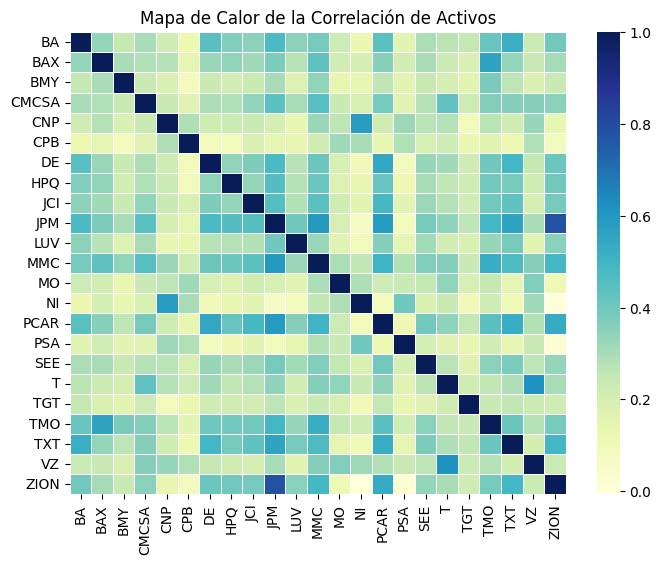

In [6]:
# Correlation matrix
mat_corr = returns.corr().to_numpy() 

# Configurando el tamaño de la figura
plt.figure(figsize=(8, 6))
sns.heatmap(mat_corr, linewidths=.5, cmap="YlGnBu", xticklabels=assets, yticklabels=assets)
# Añadiendo título
plt.title("Mapa de Calor de la Correlación de Activos")

# Mostrando la gráfica
plt.show()

Hacemos la gráfica de rentabilidad-riesgo de los activos

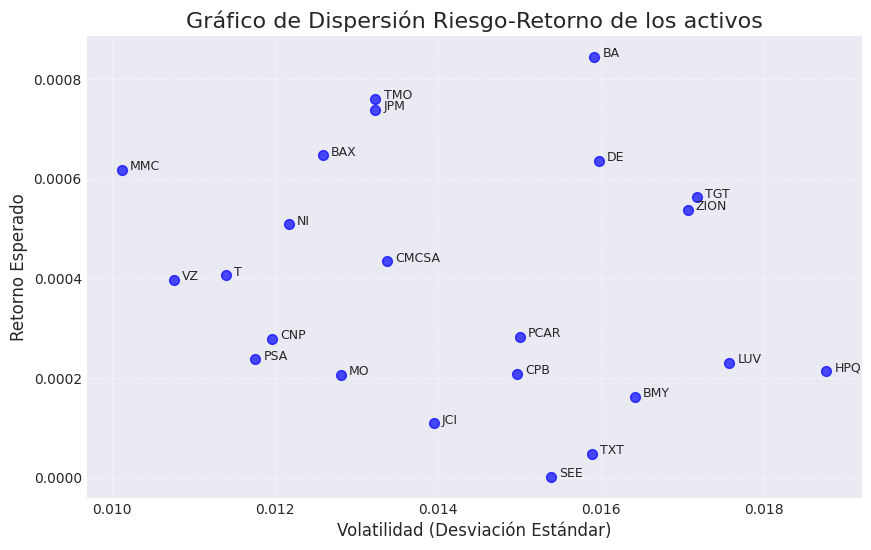

In [7]:
# Estableciendo un tamaño y estilo para el gráfico
plt.figure(figsize=(10, 6))
plt.style.use('seaborn-v0_8-darkgrid')

plt.scatter(np.sqrt(np.diag(matriz_cov)), retornos_esperados, color='blue', s=50, label='Activos', alpha=0.7)

# Añadiendo títulos y etiquetas
plt.title('Gráfico de Dispersión Riesgo-Retorno de los activos', fontsize=16)
plt.xlabel('Volatilidad (Desviación Estándar)', fontsize=12)
plt.ylabel('Retorno Esperado', fontsize=12)

# Añadiendo leyenda con mejor posición
#plt.legend(loc='best')

# Añadiendo los nombres de los activos con un desplazamiento
desplazamiento_x = 0.0001  # Ajusta este valor según sea necesario

for i, asset in enumerate(assets):
    plt.text(np.sqrt(matriz_cov[i, i]) + desplazamiento_x, retornos_esperados[i] , asset, fontsize=9)



# Mostrando la cuadrícula para mejor lectura
plt.grid(True, linestyle='--', alpha=0.5)

# Mostrar el gráfico
plt.show()


### 1. Cálculo de la cartera de mínimo riesgo

Como hemos visto, el efecto de la diversificación, nos permite reducir el riesgo de una inversión.

Si el número de activos es muy alto, podríamos eliminar todo el riesgo de los activos pero no el de mercado.

Veamos cuál es el riesgo mínimo que podemos lograr con los actvos que hemos elegido, para ello calculamos la cartera con menor riesgo:

In [8]:
#Variables de decisión
pesos = cp.Variable(num_act)

La función cp.quad_form(pesos, matriz_cov) de la librería cvxpy es:

$\qquad \qquad cp.quad\_form(pesos, matriz\_cov) = pesos^T*matriz\_cov*pesos = \sigma^2_{cartera}$

In [9]:
# Función objetivo
riesgo = cp.quad_form(pesos, matriz_cov)

In [10]:
#Restricciones
constraints = [pesos >= 0,  # No shorting
               cp.sum(pesos) == 1, # Fully invested
               ]

In [11]:
#Función Obejetivo
objective = cp.Minimize(riesgo) # Minimizar la varianza

In [12]:
#Problema y resuelvo
prob = cp.Problem(objective, constraints)
prob.solve()

4.977757594442931e-05

In [13]:
#Guardamos los valores de la rentabilidad y riesgo de la cartera de mínimo riesgo
ret = retornos_esperados.T @ pesos 
min_riesgo = np.array([riesgo.value, ret.value])

### 2. Cáculo de la cartera de máxima rentabilidad

No hace falta que vuelva a definir las variables de decisión o restricciones ya que las he definido antes


- $pesos = cp.Variable(num\_act)$

- $constraints = [pesos >= 0, cp.sum(pesos) == 1]$


In [14]:
# Cálculo de la cartera de máxima rentabilidad

objective = cp.Maximize(ret)

prob = cp.Problem(objective, constraints)
prob.solve()


/usr/local/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


0.0008449383229098959

In [15]:
#Guardamos los valores de la rentabilidad y riesgo de la cartera de mínimo riesgo
ret = retornos_esperados.T @ pesos
max_ret = np.array([riesgo.value, ret.value])

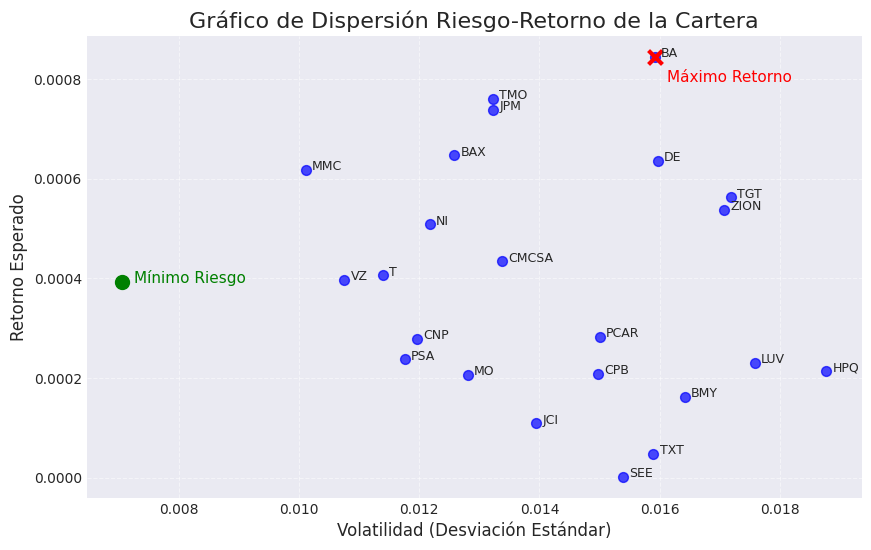

In [16]:
# Estableciendo un tamaño y estilo para el gráfico
plt.figure(figsize=(10, 6))
plt.style.use('seaborn-v0_8-darkgrid')

# Puntos de cada activo
plt.scatter(np.sqrt(np.diag(matriz_cov)), retornos_esperados, color='blue', s=50, label='Activos', alpha=0.7)

# Añadiendo los nombres de los activos con un desplazamiento
desplazamiento_x = 0.0001  # Ajusta este valor según sea necesario
desplazamiento_y = 0.00005  # Ajusta este valor según sea necesario

for i, asset in enumerate(assets):
    plt.text(np.sqrt(matriz_cov[i, i]) + desplazamiento_x, retornos_esperados[i] , asset, fontsize=9)


# Punto de mínimo riesgo
plt.scatter(np.sqrt(min_riesgo[0]), min_riesgo[1], color='green', s=100, marker='o', label='Mínimo Riesgo')
plt.text(np.sqrt(min_riesgo[0]) + 2*desplazamiento_x, min_riesgo[1], 'Mínimo Riesgo', fontsize=11, color='green')

# Punto de máximo retorno
plt.scatter(np.sqrt(max_ret[0]), max_ret[1], color='red', s=100, marker='x', linewidths=3, label='Máximo Retorno')
plt.text(np.sqrt(max_ret[0]) + 2*desplazamiento_x, max_ret[1] - desplazamiento_y, 'Máximo Retorno', fontsize=11, color='red')

# Añadiendo títulos y etiquetas
plt.title('Gráfico de Dispersión Riesgo-Retorno de la Cartera', fontsize=16)
plt.xlabel('Volatilidad (Desviación Estándar)', fontsize=12)
plt.ylabel('Retorno Esperado', fontsize=12)

# Añadiendo leyenda con mejor posición
#plt.legend(loc='best')

# Mostrando la cuadrícula para mejor lectura
plt.grid(True, linestyle='--', alpha=0.5)

# Mostrar el gráfico
plt.show()


---

### 3. Cáculo de la cartera de máxima rentabilidad dado un riesgo máximo permitido

Se trata de encontrar la cartera que, no excediendo el riesgo máximo definido, genere la máxima rentabilidad.

In [17]:
#riesgo máximo
riesgo_obj = 0.012

In [18]:
#Variables de decisión
pesos = cp.Variable(num_act)

# Función objetivo
rentabilidad = cp.Maximize(retornos_esperados.T @ pesos)

#Restricciones
riesgo = cp.quad_form(pesos, matriz_cov)

constraints = [pesos >= 0,
                cp.sum(pesos) == 1,
                riesgo <= riesgo_obj**2
                ]

prob = cp.Problem(rentabilidad, constraints)
prob.solve(solver=cp.ECOS)

0.0007992271625464327

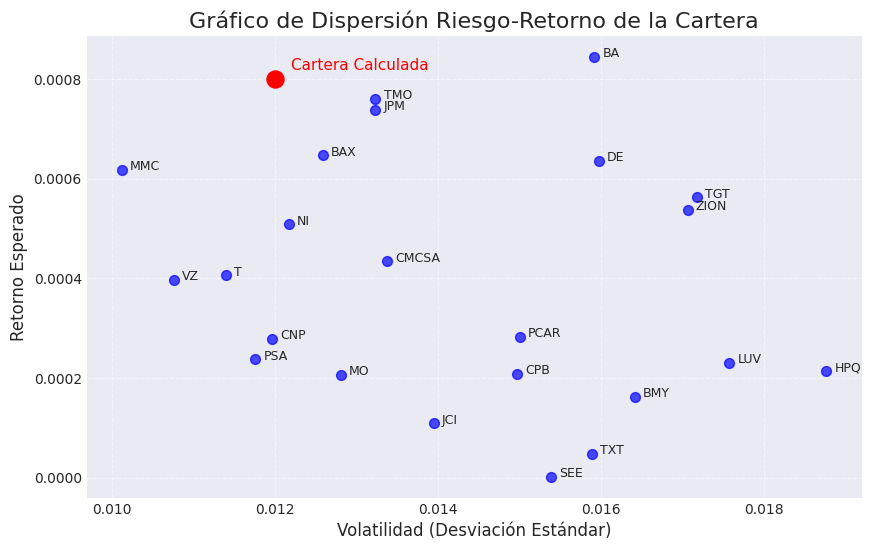

In [19]:
# Estableciendo un tamaño y estilo para el gráfico
plt.figure(figsize=(10, 6))
plt.style.use('seaborn-v0_8-darkgrid')

# Puntos de cada activo
plt.scatter(np.sqrt(np.diag(matriz_cov)), retornos_esperados, color='blue', s=50, label='Activos', alpha=0.7)

# Añadiendo los nombres de los activos con un desplazamiento
desplazamiento_x = 0.0001  # Ajusta este valor según sea necesario
desplazamiento_y = 0.00002  # Ajusta este valor según sea necesario

for i, asset in enumerate(assets):
    plt.text(np.sqrt(matriz_cov[i, i]) + desplazamiento_x, retornos_esperados[i] , asset, fontsize=9)


# Punto de cartera calculada
plt.scatter(riesgo_obj, rentabilidad.value, color='red', s=150, marker='o', label='Mínimo Riesgo')
plt.text(riesgo_obj + 2*desplazamiento_x, rentabilidad.value+desplazamiento_y, 'Cartera Calculada', fontsize=11, color='red')

# Añadiendo títulos y etiquetas
plt.title('Gráfico de Dispersión Riesgo-Retorno de la Cartera', fontsize=16)
plt.xlabel('Volatilidad (Desviación Estándar)', fontsize=12)
plt.ylabel('Retorno Esperado', fontsize=12)

# Mostrando la cuadrícula para mejor lectura
plt.grid(True, linestyle='--', alpha=0.5)

# Mostrar el gráfico
plt.show()

---

### 4. Cáculo de la cartera de máxima rentabilidad según tolerancia al riesgo

Los inversores tienen distintos niveles de tolerancia al riesgo, conocida como aversión al riesgo.

Ahora vamos a calcular las carteraas con la mayor rentabilidad para distintos niveles de aversión al riesgo.

- El factor $\Large \boldsymbol{\gamma}$ representa la aversión al riesgo de un inversor.

- Hay que tener en cuenta que $\Large \boldsymbol{\gamma}$ $\geq 0$ 
  
- Un $\Large \boldsymbol{\gamma}$ bajo indica mayor tolerancia al riesgo para buscar altos rendimientos.
  
- Un $\Large \boldsymbol{\gamma}$ alto muestra preferencia por inversiones seguras con rendimientos menores.
  
- $\Large \boldsymbol{\gamma}$ equilibra riesgo y rendimiento en la selección de carteras.


Nota: Este ejemplo se basa en la documentación de la librería [CVXPY Documentation](https://www.cvxpy.org/)


In [20]:
#Variables de decisión
pesos = cp.Variable(num_act)

# Función objetivo
rentabilidad = cp.Maximize(retornos_esperados.T @ pesos)

#Restricciones
riesgo = cp.quad_form(pesos, matriz_cov)

constraints = [pesos >= 0,
                cp.sum(pesos) == 1,
                riesgo <= riesgo_obj**2
                ]

prob = cp.Problem(rentabilidad, constraints)
prob.solve(solver=cp.ECOS)

0.0007992271625464327

In [21]:
#Variables de decisión
pesos = cp.Variable(num_act)

# Factor aversión al riesgo
gamma = cp.Parameter(nonneg=True)

ret = retornos_esperados.T @ pesos

riesgo = cp.quad_form(pesos, matriz_cov)





Definimos la **función objetivo**:

- La función objetivo busca maximizar las ganancias, pero reduce la rentabilidad si hay mucho riesgo.

- Restar el riesgo multiplicado por el factor gamma hace que, a igual rentabilidad, se elijan carteras menos riesgosas.

- Con un gamma alto, que indica poca tolerancia al riesgo, se prioriza la seguridad aunque las ganancias sean menores.

In [ ]:
objetivo = cp.Maximize(ret - gamma*riesgo)

In [61]:
#Restricciones y función objetivo
constraints = [pesos >= 0,
                cp.sum(pesos) == 1
                ]

prob = cp.Problem(objetivo, constraints)

In [41]:
#resolvemos para diferentes valores de gamma
num_sim = 100
riesgos_res = np.zeros(num_sim)
retornos_res = np.zeros(num_sim)
gamma_vals = np.logspace(-2, 3, num=num_sim)

for i in range(num_sim):
    gamma.value = gamma_vals[i]
    prob.solve()
    retornos_res[i] = ret.value
    riesgos_res[i] = cp.sqrt(riesgo).value


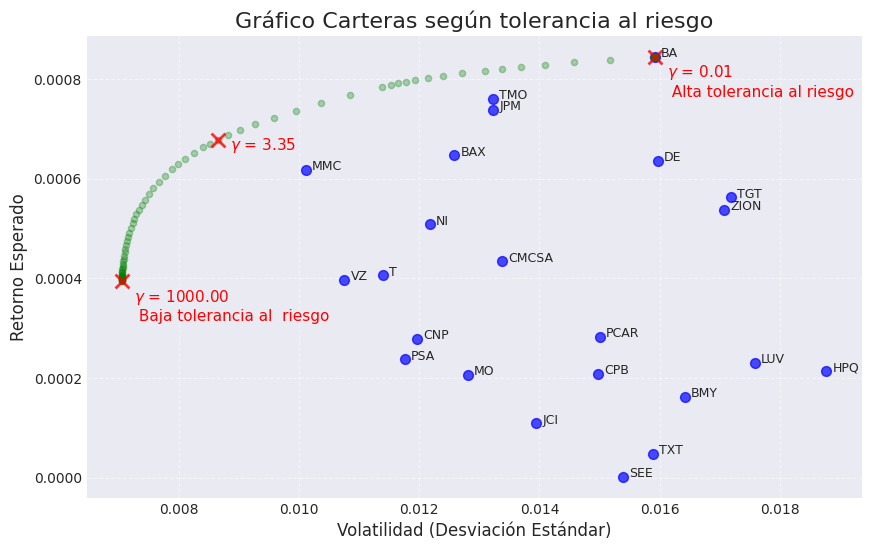

In [60]:
# Estableciendo un tamaño y estilo para el gráfico
plt.figure(figsize=(10, 6))
plt.style.use('seaborn-v0_8-darkgrid')

# Puntos de cada activo
plt.scatter(np.sqrt(np.diag(matriz_cov)), retornos_esperados, color='blue', s=50, label='Activos', alpha=0.7)

# Añadiendo los nombres de los activos con un desplazamiento
desplazamiento_x = 0.0001  # Ajusta este valor según sea necesario
desplazamiento_y = 0.00002  # Ajusta este valor según sea necesario

for i, asset in enumerate(assets):
    plt.text(np.sqrt(matriz_cov[i, i]) + desplazamiento_x, retornos_esperados[i] , asset, fontsize=9)

plt.scatter(riesgos_res, retornos_res, color='green', s=20, marker='o',  alpha=0.3)   

plt.scatter(riesgos_res[num_sim-1], retornos_res[num_sim-1], color='red', s=100, marker='x',  linewidths=2, alpha=0.8, label = f'$\gamma$ = {gamma_vals[num_sim-1]:.2f}')
plt.text(riesgos_res[num_sim-1] + 2*desplazamiento_x, retornos_res[num_sim-1] - 4 * desplazamiento_y, f'$\gamma$ = {gamma_vals[num_sim-1]:.2f} \n Baja tolerancia al  riesgo', fontsize=11, color='red')

plt.scatter(riesgos_res[int(num_sim/2)], retornos_res[int(num_sim/2)], color='red', s=100, marker='x',  linewidths=2, alpha=0.8, label = f'$\gamma$ = {gamma_vals[int(num_sim/2)]:.2f}')
plt.text(riesgos_res[int(num_sim/2)] + 2*desplazamiento_x, retornos_res[int(num_sim/2)] - desplazamiento_y, f'$\gamma$ = {gamma_vals[int(num_sim/2)]:.2f}', fontsize=11, color='red')

plt.scatter(riesgos_res[int(0)], retornos_res[int(0)], color='red', s=100, marker='x',  linewidths=2, alpha=0.8, label = f'$\gamma$ = {gamma_vals[int(0)]:.2f}')
plt.text(riesgos_res[int(0)] + 2*desplazamiento_x, retornos_res[int(0)] - 4*desplazamiento_y, f'$\gamma$ = {gamma_vals[0]:.2f}\n Alta tolerancia al riesgo', fontsize=11, color='red')

# Añadiendo títulos y etiquetas
plt.title('Gráfico Carteras según tolerancia al riesgo', fontsize=16)
plt.xlabel('Volatilidad (Desviación Estándar)', fontsize=12)
plt.ylabel('Retorno Esperado', fontsize=12)

# Añadiendo leyenda con mejor posición
#plt.legend(loc='best')

# Mostrando la cuadrícula para mejor lectura
plt.grid(True, linestyle='--', alpha=0.5)

# Mostrar el gráfico
plt.show()



---

### 5. Carteras con restricciones en número mínimo de activos y de rentabilidad esperada

Se busca encontrar una cartera que no solo supere un determinado nivel de rentabilidad, sino que también incluya un número mínimo de activos, promoviendo así la diversificación.

In [84]:
# Definimos el retorno mínimo deseado como un factor del retorno máximo
factor = 0.8
minimum_return = factor * retornos_esperados.max()


In [85]:
#Variables de decisión
weights = cp.Variable(num_act)

# The risk (variance) of the portfolio
risk = cp.quad_form(weights, matriz_cov)

In [86]:
# Constraints

# 1. The sum of the weights is 1 (fully invested portfolio)
constraint_sum_of_weights = cp.sum(weights) == 1

# 2. The expected return of the portfolio is at least the minimum desired return
constraint_expected_return = weights @ retornos_esperados >= minimum_return

# 3. No short selling (weights are non-negative)
constraint_no_short_selling = weights >= 0


Ahora definimos las restricciones que aseguran tener un número mínimo de activos:

**Inclusión de al menos 5 activos**: 

  - Se utilizan variables binarias para la selección ($selection$).

  - Estas variables valen 1 si el activo forma parte de la cartera o 0 en caso contrario
  
  - $constraint\_minimum\_assets = cp.sum(selection) >= 5$ asegura que al menos 5 activos sean incluidos.

**Vinculación de variables de selección con los pesos**:

  - $constraint\_link\_selection\_weights = weights \leq selection$ crea una relación entre cada peso y su variable de selección.
   
    - Si un activo no está seleccionado ($selection[i] = 0$), su peso ($weights[i]$) se establece en cero. Esto impide que activos no seleccionados influyan en la cartera.
  
    - Si un activo está seleccionado ($selection[i] = 1$), su peso puede ser positivo, permitiendo su inclusión en la cartera.
  
    - Este método asegura que solo los activos seleccionados tengan un impacto en la composición de la cartera.

In [87]:
# 4. At least 5 assets must be included in the portfolio
# We use binary variables for selection
selection = cp.Variable(num_act, boolean=True)
constraint_minimum_assets = cp.sum(selection) >= 5

# Link the selection variables with the weights
# This ensures that weights are set to zero for assets that are not selected
constraint_link_selection_weights = weights <= selection

# The weights must be either 0 or greater than a small positive value if the asset is selected
# This ensures that if an asset is selected, it has a meaningful weight in the portfolio
small_positive_value = 1e-4
constraint_weight_significance = weights >= small_positive_value * selection

In [91]:
# Problem
problem = cp.Problem(cp.Minimize(risk), 
                     [constraint_sum_of_weights,
                      constraint_expected_return,
                      constraint_no_short_selling,
                      constraint_minimum_assets,
                      constraint_link_selection_weights,
                      constraint_weight_significance])

# Solve the problem
problem.solve(solver=cp.ECOS_BB) #Hay que indicar el solver ya que hay variables binarias

In [89]:
# Display the weights of the assets in the optimal portfolio
pesos_ajustados = np.array([x if x > 10**-3 else 0  for x in weights.value]) #Ajustamos los pesos a 0 si son muy pequeños

print("Los pesos de la cartera calculada son:")
print(pesos_ajustados)

Los pesos de la cartera calculada son:
[0.         0.11071121 0.         0.         0.         0.
 0.         0.         0.         0.28862311 0.         0.13371884
 0.         0.15427989 0.         0.         0.         0.
 0.03606864 0.27649786 0.         0.         0.        ]


In [90]:
assets_array = np.array(assets)
activos_seleccionados = assets_array[pesos_ajustados != 0]

# Display which assets are included in the optimal portfolio
print("Los activos incluídos en la cartera calculada son:")
print(activos_seleccionados)

Los activos incluídos en la cartera calculada son:
['BAX' 'JPM' 'MMC' 'NI' 'TGT' 'TMO']


---

In [25]:
cp.installed_solvers()

['CLARABEL', 'ECOS', 'ECOS_BB', 'OSQP', 'SCIPY', 'SCS']